***Import Dependcies***

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


***Data Collection and Preprocessing***

In [6]:
data =pd.read_csv('car data.csv')

In [8]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


***Data Summary***

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
data.shape

(301, 9)

In [11]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

***Data Analysis***

In [10]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


***See Catogorical Values***

In [15]:
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


***Label Encoding***

In [16]:
from sklearn.preprocessing  import LabelEncoder
encoder=LabelEncoder()
data['Fuel_Type']=encoder.fit_transform(data['Fuel_Type'])
data['Seller_Type']=encoder.fit_transform(data['Seller_Type'])
data['Transmission']=encoder.fit_transform(data['Transmission'])

In [17]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


***Train Test Split***

In [18]:
X=data.drop(['Car_Name','Selling_Price'],axis=1)
Y=data['Selling_Price']

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

***Model Training***

In [21]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)


LinearRegression()

***Testing***

In [22]:
pred=lin_reg.predict(X_test)
print(pred)
print(Y_test)

[10.39222503  0.71269634  4.26367425  4.89542882  9.84484784  4.22631808
  7.1173891   7.37327394  0.1592961   5.16712598  6.20624893  6.17414198
  2.11880837  7.74045843  1.92235986  1.71406658  2.02899942  1.8536463
  9.35171759  4.2546458   1.48996098  9.14496453  1.45846216  9.63402658
  0.82165042  8.07898502  1.53763892 -3.19873666  4.22373915  2.09526116
  3.42865389  3.72427545  5.58001877  7.75879392 -1.91563192  6.80980082
  8.20694812  5.81047156  6.15629896  6.27493028 16.02197751  2.07455343
  1.04886513 -0.45830577  6.82090538  6.78567581  0.98725428  6.83257783
 14.31925066  3.01359825  8.04481951 -0.89441322  8.99139759  1.14814903
  2.1191082  -0.82919712  0.68456956 10.02743111 -0.46773344 -2.43254957
 10.0831552 ]
99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
       ...  
172     0.40
94      4.00
160     0.45
199     0.12
91     11.25
Name: Selling_Price, Length: 61, dtype: float64


In [23]:
score=metrics.r2_score(Y_test,pred)
print(score)

0.8401532365377663


***Visualization***

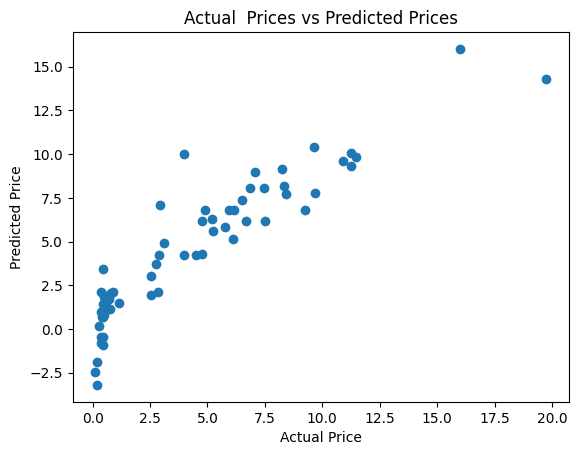

In [24]:
plt.scatter(Y_test,pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual  Prices vs Predicted Prices")
plt.show()

***Application Phase***

In [34]:
Year=input("Enter Year").strip()
Present_Price=input("Enter Present-Price: ").strip()
Kms_Driven=input(" Enter Kms_Driven: ").strip()
Fuel_Type=input("Enter Fuel_Type: ").strip()
Seller_Type=input("Enter Seller Type: ").strip()
Transmission=input("Enter Transmission: ").strip()
Owner=input("Enter Owner: ").strip()


Enter Year2014
Enter Present-Price: 6.87
 Enter Kms_Driven: 42450
Enter Fuel_Type: Diesel
Enter Seller Type: Dealer
Enter Transmission: Manual
Enter Owner: 0


In [35]:

data = {
    'Year': [Year],
    'Present_Price': [Present_Price],
    'Kms_Driven': [Kms_Driven],
    'Fuel_Type': [Fuel_Type],
    'Seller_Type': [Seller_Type],
    'Transmission': [Transmission],
    'Owner': [Owner]
}
df=pd.DataFrame(data)
df.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,6.87,42450,Diesel,Dealer,Manual,0


In [36]:
df['Fuel_Type']=encoder.fit_transform(df['Fuel_Type'])
df['Seller_Type']=encoder.fit_transform(df['Seller_Type'])
df['Transmission']=encoder.fit_transform(df['Transmission'])

In [37]:
predict_car_price=lin_reg.predict(df)
print(predict_car_price)

[9.52662988]
